In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
import matplotlib.pyplot as plt

In [3]:
from PIL import Image

In [4]:
import sys
sys.path.append("../figures")

from robust_what import WhatShift, WhatBackground, WhatNet, WhatTrainer, What, train, test, MNIST

In [5]:
from main import init
args = init(filename='../data/2019-06-05')
args

{'w': 28,
 'minibatch_size': 100,
 'train_batch_size': 50000,
 'test_batch_size': 10000,
 'noise_batch_size': 1000,
 'mean': 0.1307,
 'std': 0.3081,
 'N_pic': 128,
 'offset_std': 30,
 'offset_max': 34,
 'noise': 1.0,
 'contrast': 0.7,
 'sf_0': 0.1,
 'B_sf': 0.1,
 'N_theta': 6,
 'N_azimuth': 24,
 'N_eccentricity': 10,
 'N_phase': 2,
 'rho': 1.41,
 'bias_deconv': True,
 'p_dropout': 0.0,
 'dim1': 1000,
 'dim2': 1000,
 'lr': 0.005,
 'do_adam': True,
 'bn1_bn_momentum': 0.5,
 'bn2_bn_momentum': 0.5,
 'momentum': 0.3,
 'epochs': 60,
 'num_processes': 1,
 'no_cuda': True,
 'log_interval': 100,
 'verbose': 1,
 'filename': '../data/2019-06-05',
 'seed': 2019,
 'N_cv': 10,
 'do_compute': True}

## Unit tests

In [6]:
transform=transforms.Compose([
                               WhatShift(args, i_offset=None, j_offset=None),
                               WhatBackground(),
                               transforms.ToTensor(),
                               #transforms.Normalize((args.mean,), (args.std,))
                           ])

In [7]:
dataset_train = MNIST('../data',
                        train=True,
                        download=True,
                        transform=transform,
                        )

In [8]:
train_loader = torch.utils.data.DataLoader(dataset_train,
                                         batch_size=args.minibatch_size,
                                         shuffle=True)

In [9]:
dataset_test = MNIST('../data',
                        train=False,
                        download=True,
                        transform=transform,
                        )

In [10]:
test_loader = torch.utils.data.DataLoader(dataset_test,
                                         batch_size=args.minibatch_size,
                                         shuffle=True)

In [32]:
data, label = next(iter(test_loader))

In [33]:
label.shape

torch.Size([100])

Text(0.5, 1.0, 'label : 1')

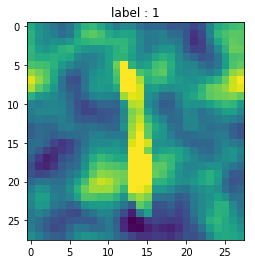

In [34]:
i = 3
plt.imshow(data[i,:,:].detach().numpy().reshape((28, 28)))
plt.title('label : '+str(label[i].item()))

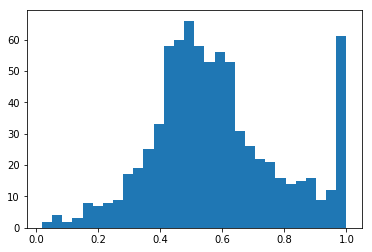

In [14]:
h = plt.hist(data[1,:,:].detach().numpy().flatten(), 30)

In [15]:
device = 'cpu'
model = WhatNet().to(device)
loss_func = F.nll_loss
optimizer = optim.Adam(model.parameters(), lr = 1e-3)

In [16]:
if False:
    for epoch in range(1, args.epochs + 1):
        train(args, model, device, train_loader, loss_func, optimizer, epoch)
        test(args, model, device, test_loader)

## What class test

In [17]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

from PIL import Image

import sys
sys.path.append("../figures")

from robust_what import WhatShift, WhatBackground, WhatNet, WhatTrainer, What, train, test, MNIST

from main import init
args = init(filename='../data/2019-06-05')

args.epochs = 2
args.noise = 1
args.save_model = True
what = What(args=args, force= True)

Train Epoch: 1/2 [0/60000 (0%)]	Loss: 2.303312
Train Epoch: 1/2 [10000/60000 (17%)]	Loss: 2.294833
Train Epoch: 1/2 [20000/60000 (33%)]	Loss: 2.296527
Train Epoch: 1/2 [30000/60000 (50%)]	Loss: 2.301717
Train Epoch: 1/2 [40000/60000 (67%)]	Loss: 2.301782
Train Epoch: 1/2 [50000/60000 (83%)]	Loss: 2.295462

Test set: Average loss: 2.3012, Accuracy: 1135/10000 (11%)

Train Epoch: 2/2 [0/60000 (0%)]	Loss: 2.295336
Train Epoch: 2/2 [10000/60000 (17%)]	Loss: 2.308299
Train Epoch: 2/2 [20000/60000 (33%)]	Loss: 2.309455
Train Epoch: 2/2 [30000/60000 (50%)]	Loss: 2.304475
Train Epoch: 2/2 [40000/60000 (67%)]	Loss: 2.309327
Train Epoch: 2/2 [50000/60000 (83%)]	Loss: 2.303317

Test set: Average loss: 2.3014, Accuracy: 1135/10000 (11%)

../data/MNIST_cnn_robust_what_0.1_0.1_1_0.7.pt


## Accuracy de MNIST_cnn_robust_what_0.1_0.1_1_0.7.pt

In [18]:
model = torch.load("../data/MNIST_cnn_robust_what_0.1_0.1_1_0.7.pt")
transform = transforms.Compose([
    WhatShift(args, i_offset=None, j_offset=None),
    WhatBackground(),
    transforms.ToTensor(),
    # transforms.Normalize((args.mean,), (args.std,))
])
dataset_test = MNIST('../data',
                              train=False,
                              download=True,
                              transform=transform,
                              )
test_loader = torch.utils.data.DataLoader(dataset_test,
                                          batch_size=args.minibatch_size,
                                          shuffle=True)
whatTrainer = WhatTrainer(args, model=model, test_loader=test_loader)
acc = whatTrainer.test()


Test set: Average loss: 2.3014, Accuracy: 1135/10000 (11%)

